### PV dataset EDA

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk

In [16]:
df = pd.read_csv('core\\static\\data\\2022_15min_data.csv')
df.head()

,Time,PV Productie (W)
0,2021-12-26 00:00:00,0.0
1,2021-12-26 00:15:00,0.0
2,2021-12-26 00:30:00,0.0
3,2021-12-26 00:45:00,0.0
4,2021-12-26 01:00:00,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              33600 non-null  object 
 1   PV Productie (W)  33600 non-null  float64
dtypes: float64(1), object(1)
memory usage: 525.1+ KB


In [18]:
df.shape

(33600, 2)

In [19]:
df.describe()

,PV Productie (W)
count,33600.000000
mean,270.817604
std,489.592830
min,0.000000
25%,0.000000
50%,0.000000
75%,298.997025
max,2756.399200


In [20]:
df['Time'] = pd.to_datetime(df['Time'])
df['DateTime'] = df['Time'] 
df = df.drop('Time', axis=1)
df.head()

,PV Productie (W),DateTime
0,0.0,2021-12-26 00:00:00
1,0.0,2021-12-26 00:15:00
2,0.0,2021-12-26 00:30:00
3,0.0,2021-12-26 00:45:00
4,0.0,2021-12-26 01:00:00


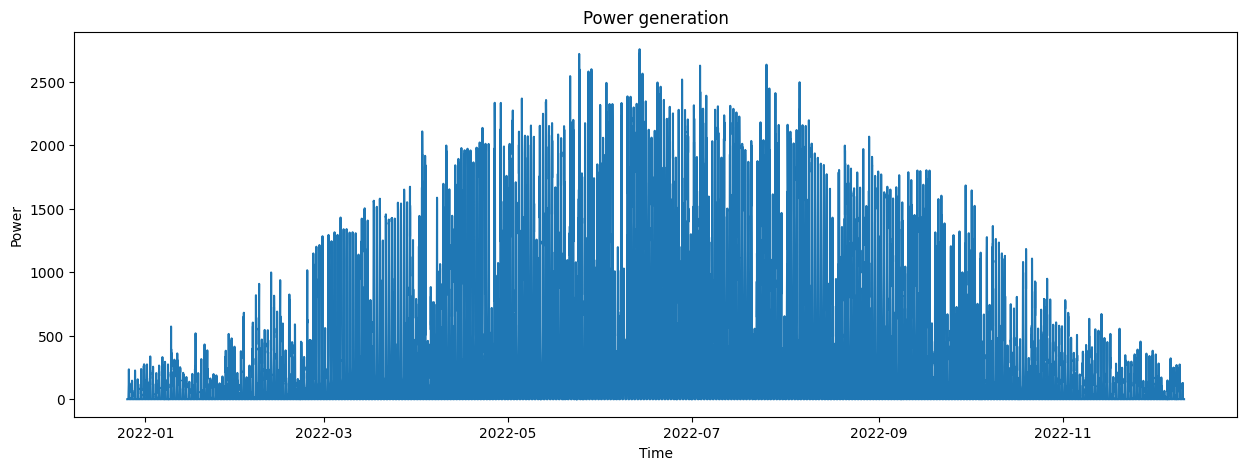

In [21]:
# Plot whole dataset, datetime x,power y
plt.figure(figsize=(15, 5))
plt.plot(df['DateTime'], df['PV Productie (W)'])
plt.title('Power generation')
plt.xlabel('Time')
plt.ylabel('Power')
plt.show()

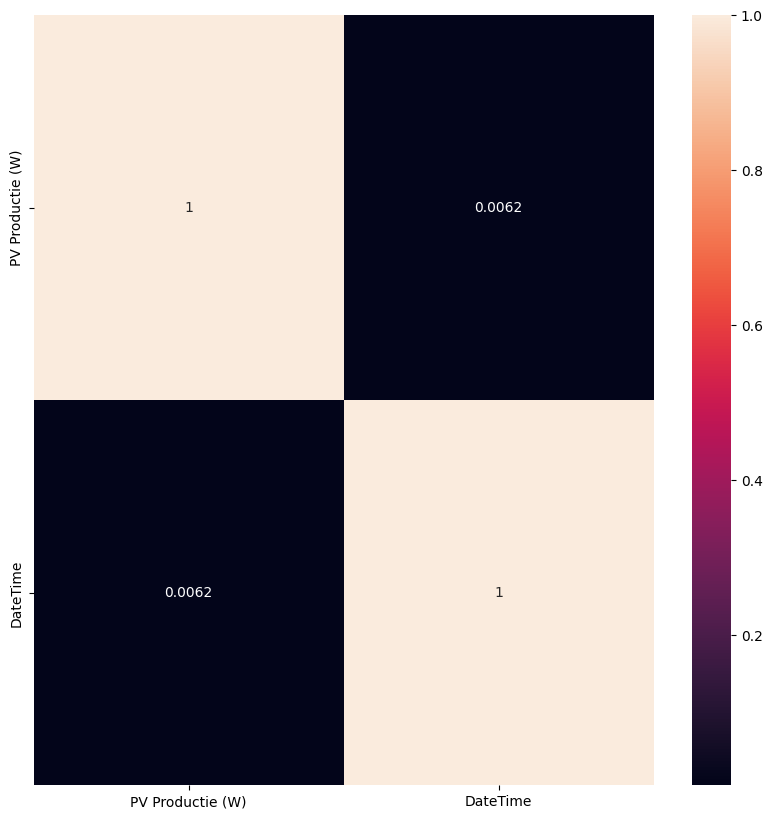

In [22]:
# Correlation
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()


In [23]:
# Lets combine the dataframes
df_pv = pd.read_csv('core\\static\\data\\2022_15min_data.csv', sep=',', low_memory=False)
df_solar = pd.read_csv('core\\static\\data\\solar_simulation_data.csv', sep=',', low_memory=False)

In [24]:
df_pv.head()

,Time,PV Productie (W)
0,2021-12-26 00:00:00,0.0
1,2021-12-26 00:15:00,0.0
2,2021-12-26 00:30:00,0.0
3,2021-12-26 00:45:00,0.0
4,2021-12-26 01:00:00,0.0


In [25]:
df_solar.head()

,Timestamp,Solar Zenith (degrees),Solar Azimuth (degrees),DNI (W/m^2),GHI (W/m^2),DHI (W/m^2),POA Global (W/m^2),Temperature (C),DC Power (W),AC Power (W)
0,2021-12-26 00:00:00+01:00,150.017744,340.977130,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-12-26 00:15:00+01:00,150.634136,347.818869,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-12-26 00:30:00+01:00,150.979467,354.841651,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-12-26 00:45:00+01:00,151.043428,1.944296,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-12-26 01:00:00+01:00,150.824056,9.016439,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Combining, getting GHI into the df_pv
df_pv['DateTime'] = pd.to_datetime(df_pv['Time'])
df_pv = df_pv.drop('Time', axis=1)
df_pv['GHI (W/m^2)'] = df_solar['GHI (W/m^2)']
df_pv.head()

,PV Productie (W),DateTime,GHI (W/m^2)
0,0.0,2021-12-26 00:00:00,0.0
1,0.0,2021-12-26 00:15:00,0.0
2,0.0,2021-12-26 00:30:00,0.0
3,0.0,2021-12-26 00:45:00,0.0
4,0.0,2021-12-26 01:00:00,0.0


In [27]:
df_pv.describe()

,PV Productie (W),DateTime,GHI (W/m^2)
count,33600.000000,33600,33505.000000
mean,270.817604,2022-06-18 23:52:30,183.184661
min,0.000000,2021-12-26 00:00:00,0.000000
25%,0.000000,2022-03-23 11:56:15,0.000000
50%,0.000000,2022-06-18 23:52:30,1.634994
75%,298.997025,2022-09-14 11:48:45,334.781577
max,2756.399200,2022-12-10 23:45:00,847.937256
std,489.592830,NaN,254.666186


In [28]:
# save into a csv
df_pv.to_csv('core\\static\\data\\2022_15min_data_with_GHI.csv', index=False)